<a href="https://colab.research.google.com/github/Nabilmg/P3/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Load and Inspect Data
We start by loading the dataset and performing an initial inspection to understand its structure.

In [5]:
# Load the data file
file_path = 'https://raw.githubusercontent.com/Nabilmg/P3/main/Zimbabwe_children_under5_interview.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,interview_date,child_age_years,child_birthday,EC6,EC7,EC8,EC9,EC10,EC11,EC12,EC13,EC14,EC15
0,2019-03-31,3,2016-02-20,2,2,1,1,2,1,1,1,2,2
1,2019-03-14,3,2015-10-19,2,2,2,1,2,2,2,1,1,1
2,2019-03-17,4,2014-10-26,2,2,2,1,1,1,2,1,2,1
3,2019-03-14,3,2015-03-21,1,2,2,1,2,1,1,1,2,1
4,2019-03-14,3,2015-05-18,2,1,1,1,2,1,2,1,2,1



##Data Cleaning and Transformation
In this section, we clean the data by handling 'Don't Know' (DK) responses and extract the relevant time information to prepare for analysis.


In [6]:
# Convert interview_date to datetime format
data['interview_date'] = pd.to_datetime(data['interview_date'])

# Define the categories for educational areas
literacy_math = ['EC6', 'EC7', 'EC8']
physical = ['EC9', 'EC10']
learning = ['EC11', 'EC12']
socio_emotional = ['EC13', 'EC14', 'EC15']

# Replace DK (value 8) with numpy's NaN in only the relevant columns
columns_to_clean = literacy_math + physical + learning + socio_emotional
for column in columns_to_clean:
    data[column] = data[column].replace(8, np.nan)

# Extract the month and year from the interview_date
data['month_year'] = data['interview_date'].dt.to_period('M')

# Create average scores for each educational area per month
data['Literacy_Math_Score'] = data[literacy_math].mean(axis=1, skipna=True)
data['Physical_Score'] = data[physical].mean(axis=1, skipna=True)
data['Learning_Score'] = data[learning].mean(axis=1, skipna=True)
data['Socio_Emotional_Score'] = data[socio_emotional].mean(axis=1, skipna=True)

# Group by month_year to calculate the average scores per month
monthly_scores = data.groupby('month_year').agg({
    'Literacy_Math_Score': 'mean',
    'Physical_Score': 'mean',
    'Learning_Score': 'mean',
    'Socio_Emotional_Score': 'mean'
}).reset_index()

monthly_scores

,month_year,Literacy_Math_Score,Physical_Score,Learning_Score,Socio_Emotional_Score
0,2018-12,1.666667,1.500000,1.500000,1.333333
1,2019-01,1.865435,1.341689,1.207124,1.409191
2,2019-02,1.869693,1.334174,1.205549,1.376208
3,2019-03,1.882764,1.361080,1.197354,1.402242
4,2019-04,1.827586,1.387931,1.068966,1.339080



##Visualization of Educational Performance Trends
In this final section, we visualize the month-by-month trends in educational performance to observe any significant patterns.


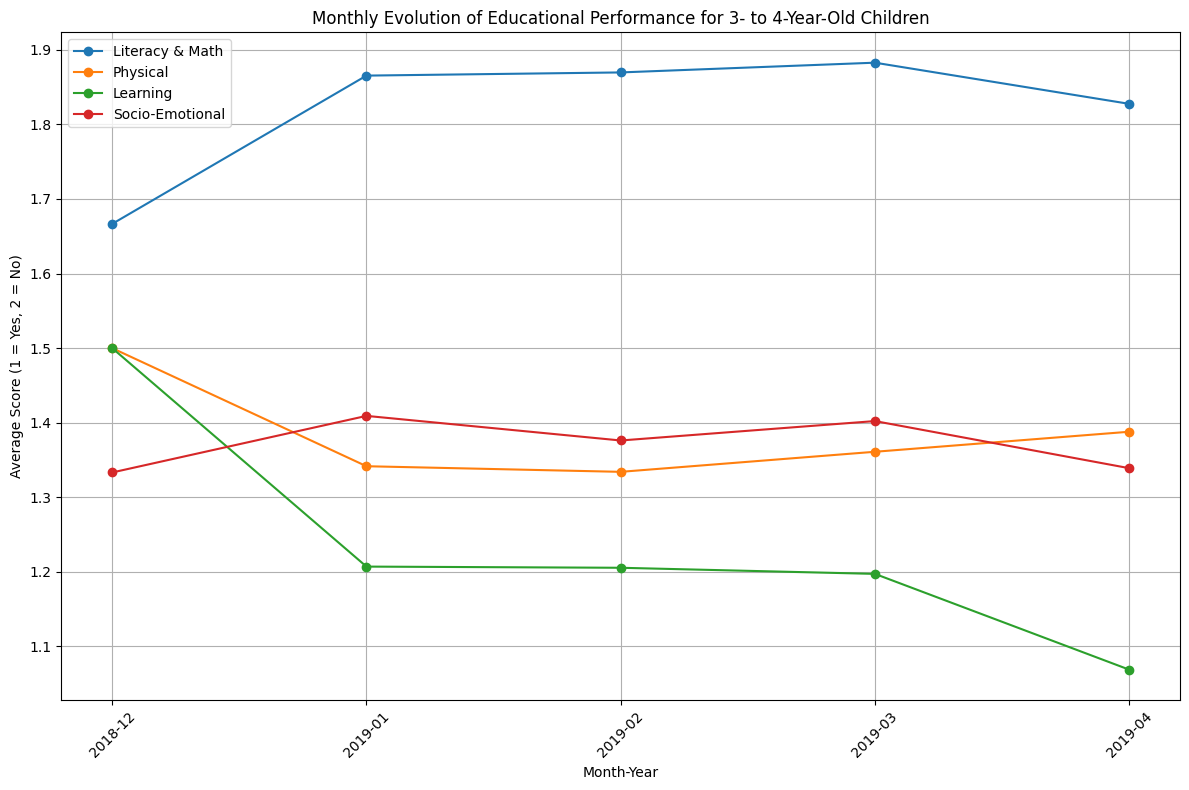

In [7]:
# Set up the plotting area
plt.figure(figsize=(12, 8))

# Plotting each educational area score over time
plt.plot(monthly_scores['month_year'].astype(str), monthly_scores['Literacy_Math_Score'], marker='o', label='Literacy & Math')
plt.plot(monthly_scores['month_year'].astype(str), monthly_scores['Physical_Score'], marker='o', label='Physical')
plt.plot(monthly_scores['month_year'].astype(str), monthly_scores['Learning_Score'], marker='o', label='Learning')
plt.plot(monthly_scores['month_year'].astype(str), monthly_scores['Socio_Emotional_Score'], marker='o', label='Socio-Emotional')

# Customizing the plot
plt.title('Monthly Evolution of Educational Performance for 3- to 4-Year-Old Children')
plt.xlabel('Month-Year')
plt.ylabel('Average Score (1 = Yes, 2 = No)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


The visualization illustrates the month-by-month evolution of educational performance in the categories of Literacy & Math, Physical, Learning, and Socio-Emotional development for 3- to 4-year-old children.

####Key Observations:
*   Literacy & Math: The scores remain relatively stable, with slight fluctuations, indicating consistency in performance over the months.
*   Physical: There is a gradual improvement in physical development scores, which may reflect better physical health or increased physical activities.
*   Learning: Learning scores show a noticeable decline, particularly after March 2019, which could indicate challenges in learning processes or external factors influencing cognitive development.
*   Socio-Emotional: The socio-emotional scores remain relatively stable but show a slight decline towards the end, which might indicate emerging socio-emotional challenges.